In [1]:
import os
import time
import pandas as pd
from dataset_path import output_path
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import os
from thesis_helper import * 

pd.set_option('float_format', '{:.3f}'.format)
path = output_path

output_path = os.path.join(path, "Figure3")
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_train_rm= pd.read_csv((os.path.join(path, 'train_exp.csv')))
df_test_rm = pd.read_csv((os.path.join(path, 'test_exp.csv')))
df_train_knn = pd.read_csv((os.path.join(path, 'train_knn.csv')))
df_test_knn = pd.read_csv((os.path.join(path, 'test_knn.csv')))
confidence_interval = 95
random_seed = 0
result_list = []

Preprocessing

In [21]:
X_train_rm,y_train_rm,X_test_rm,y_test_rm = preprocessing(path,df_train_rm,df_test_rm)
X_train_Knn,y_train_knn,X_test_knn,y_test_knn = preprocessing(path,df_train_knn,df_test_knn)

Before filtering: training size = 260292 , testing size = 65098
After filtering: training size = 137475 , testing size = 34468
Before filtering: training size = 334480 , testing size = 83620
After filtering: training size = 176213 , testing size = 44063


C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 2.6792197227478027 seconds
AUC: 0.6745634387114572
AUPRC: 0.1550285240523201
Sensitivity: 0.5796568627450981
Specificity: 0.6726154220976976
Score thresold: 0.043182078438856464
2.5 97.5


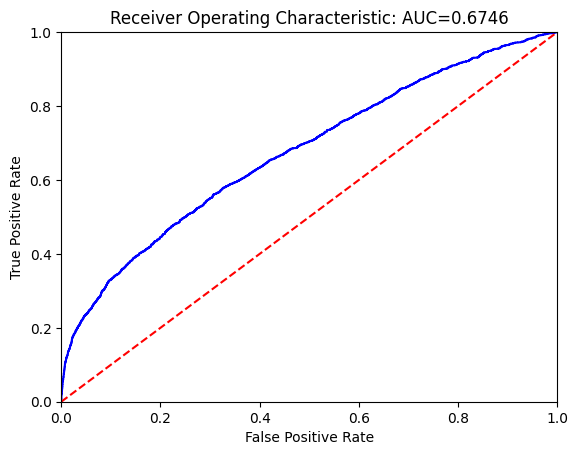

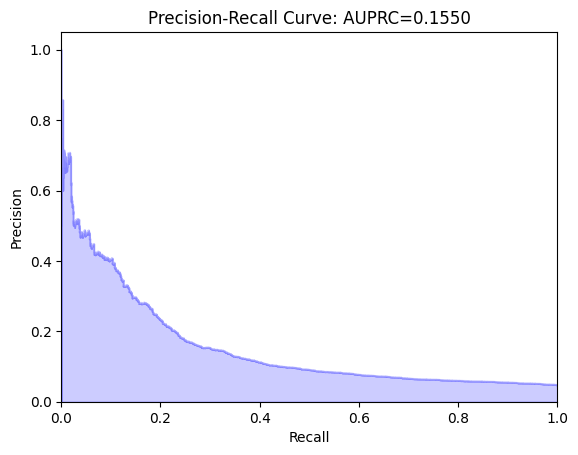

In [28]:
from sklearn.feature_selection import SelectFromModel
lo=LogisticRegression(random_state=1)
start = time.time()
lo.fit(X_train_rm,y_train_rm)
# model = SelectFromModel(lo, prefit=True)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
import pickle
with open('task3_logreg.pickle', 'wb') as model_dump:
    pickle.dump(lo, model_dump)
probs = lo.predict_proba(X_test_rm)
result = PlotROCCurve(probs[:,1],y_test_rm, ci=confidence_interval, random_seed=random_seed)
results = ["Logistic regression"]
results.extend(result)
results.append(runtime)
result_list.append(results)
find_sens_speci(lo,X_test_knn,y_test_knn)

C:\Users\Desktop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 3.135686159133911 seconds
AUC: 0.6824019706804844
AUPRC: 0.16366175855410386
Sensitivity: 0.5909514925373134
Specificity: 0.6656408788377586
Score thresold: 0.04363732885714039
2.5 97.5


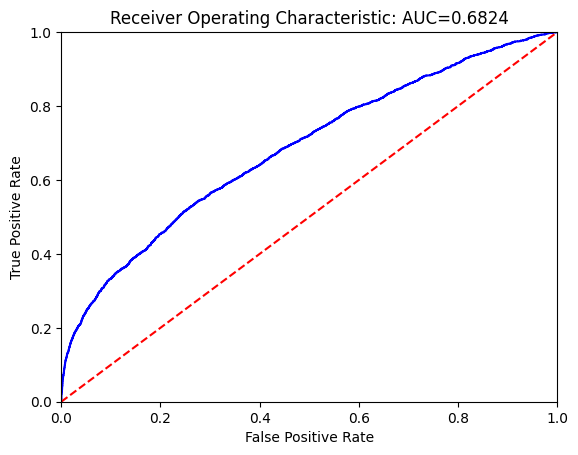

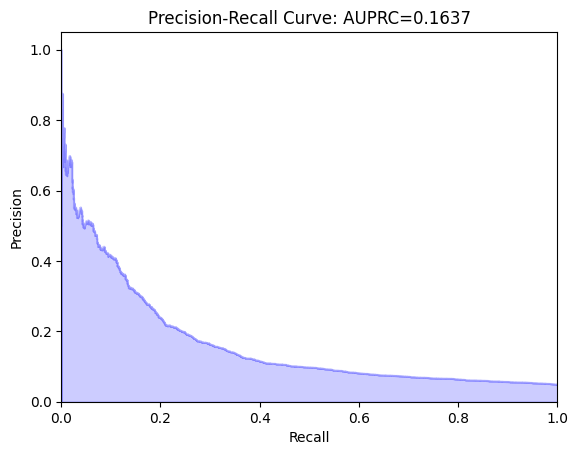

In [23]:
from sklearn.feature_selection import SelectFromModel
lo=LogisticRegression(random_state=1)
start = time.time()
lo.fit(X_train_Knn,y_train_knn)
# model = SelectFromModel(lo, prefit=True)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
import pickle
with open('task3_logreg.pickle', 'wb') as model_dump:
    pickle.dump(lo, model_dump)
probs = lo.predict_proba(X_test_knn)
result = PlotROCCurve(probs[:,1],y_test_knn, ci=confidence_interval, random_seed=random_seed)
results = ["Logistic regression"]
results.extend(result)
results.append(runtime)
result_list.append(results)
find_sens_speci(lo,X_test_knn,y_test_knn)

Training ensemble classifier on KNN

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from feature_engine.selection import SelectBySingleFeaturePerformance
from catboost import CatBoostRegressor,CatBoostClassifier
import lightgbm as lgb
sel = SelectBySingleFeaturePerformance(
    estimator=CatBoostClassifier(iterations=60,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass',random_state=45),
    scoring='roc_auc',
    cv=3,
    threshold=None,
)

X_train_t = sel.fit_transform(X_train_Knn, y_train_knn)
X_test_t = sel.transform(X_test_knn)

0:	learn: 0.2379867	total: 162ms	remaining: 9.57s
1:	learn: 0.1957981	total: 173ms	remaining: 5.01s
2:	learn: 0.1913968	total: 185ms	remaining: 3.51s
3:	learn: 0.1908999	total: 197ms	remaining: 2.76s
4:	learn: 0.1908570	total: 209ms	remaining: 2.3s
5:	learn: 0.1907990	total: 221ms	remaining: 1.99s
6:	learn: 0.1907882	total: 234ms	remaining: 1.77s
7:	learn: 0.1907662	total: 246ms	remaining: 1.6s
8:	learn: 0.1907513	total: 258ms	remaining: 1.46s
9:	learn: 0.1906947	total: 270ms	remaining: 1.35s
10:	learn: 0.1906834	total: 281ms	remaining: 1.25s
11:	learn: 0.1906639	total: 293ms	remaining: 1.17s
12:	learn: 0.1906388	total: 304ms	remaining: 1.1s
13:	learn: 0.1906330	total: 316ms	remaining: 1.04s
14:	learn: 0.1906262	total: 327ms	remaining: 980ms
15:	learn: 0.1906224	total: 336ms	remaining: 924ms
16:	learn: 0.1906202	total: 348ms	remaining: 879ms
17:	learn: 0.1906118	total: 359ms	remaining: 837ms
18:	learn: 0.1906066	total: 369ms	remaining: 796ms
19:	learn: 0.1905901	total: 379ms	remaining:

[LightGBM] [Info] Number of positive: 167809, number of negative: 167809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 335618, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0:	learn: 0.6481029	total: 30.5ms	remaining: 1.8s
1:	learn: 0.6396163	total: 51.9ms	remaining: 1.5s
2:	learn: 0.6356583	total: 73.3ms	remaining: 1.39s
3:	learn: 0.6341705	total: 94.1ms	remaining: 1.32s
4:	learn: 0.6316522	total: 117ms	remaining: 1.28s
5:	learn: 0.6307533	total: 139ms	remaining: 1.25s
6:	learn: 0.6299742	total: 159ms	remaining: 1.21s
7:	learn: 0.6288475	total: 183ms	remaining: 1.19s
8:	learn: 0.6276166	total: 204ms	remaining: 1.15s
9:	learn: 0.6272537	total: 224ms	remaining:

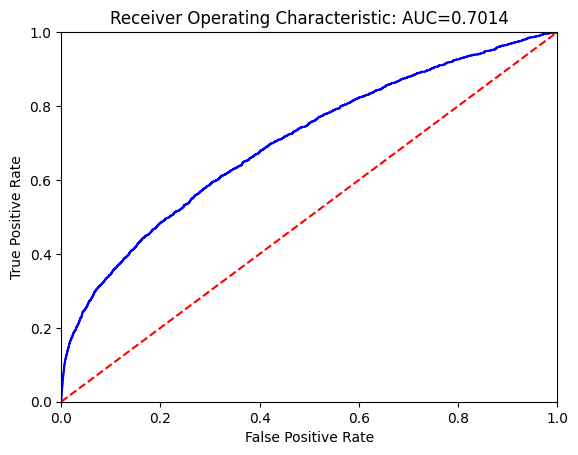

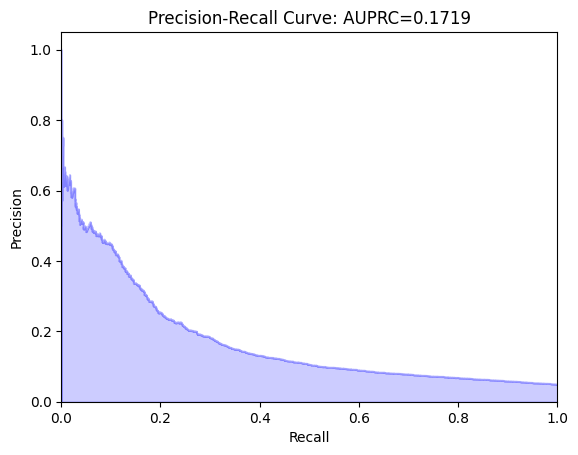

ValueError: Found input variables with inconsistent numbers of samples: [34468, 44063]

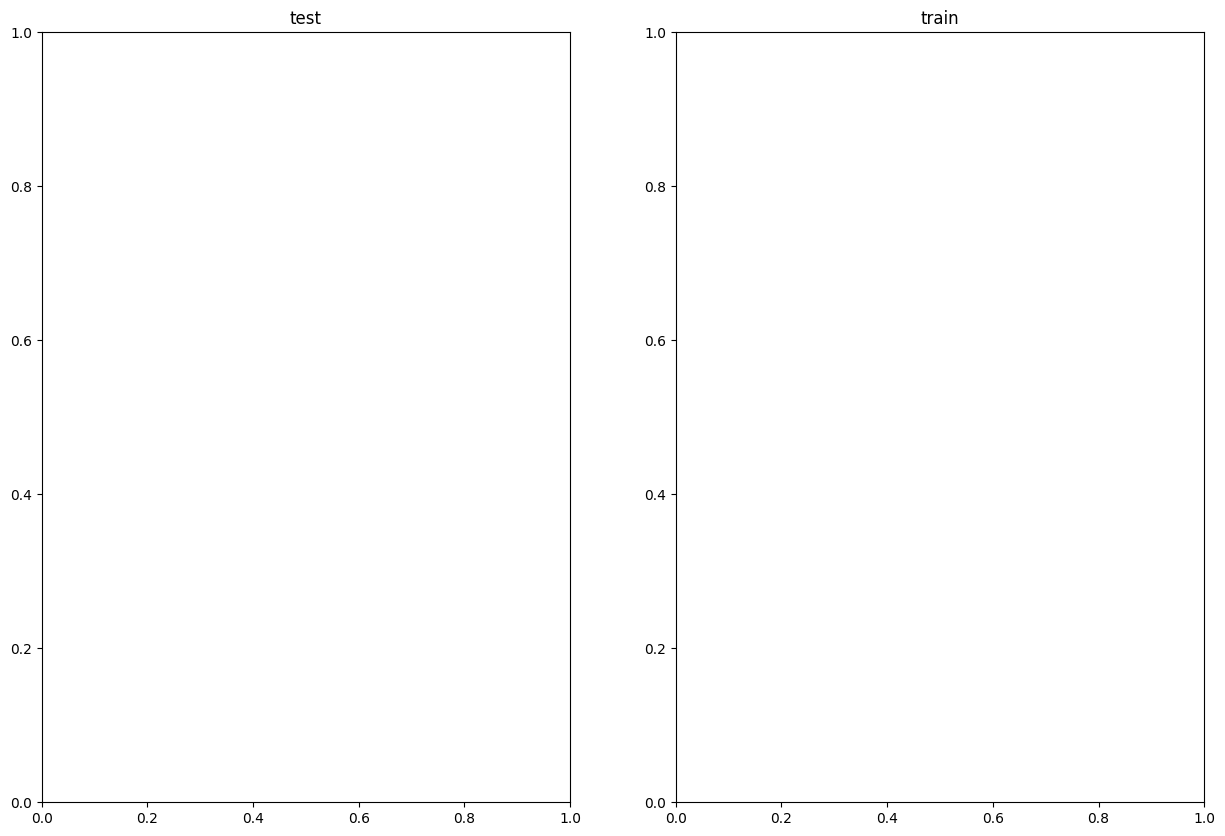

In [26]:
import lightgbm as lgb
import imblearn
from imblearn.pipeline import Pipeline
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler
# X_ros, y_ros = X_new,y_train
ros = RandomOverSampler(sampling_strategy='minority',random_state=8) # 6:6961
X_ros, y_ros = ros.fit_resample(X_train_t,y_train_knn)
clf1 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=45)
clf2 = CatBoostClassifier(iterations=60,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass',random_state=45)
clf3 = XGBClassifier(base_score=0.5, booster='gbtree',colsample_bylevel=1,
       colsample_bynode=1,colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1,n_estimators=250, n_jobs=20, nthread=None,
        random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


eclf = VotingClassifier(estimators=[('LGB', clf1), ('CatB', clf2), ('XGB', clf3)],voting='soft',weights = [1,1,1])
eclf.fit(X_ros,y_ros)
probs = eclf.predict_proba(X_test_t)
result = PlotROCCurve(probs[:,1],y_test_knn, ci=confidence_interval, random_seed=random_seed)